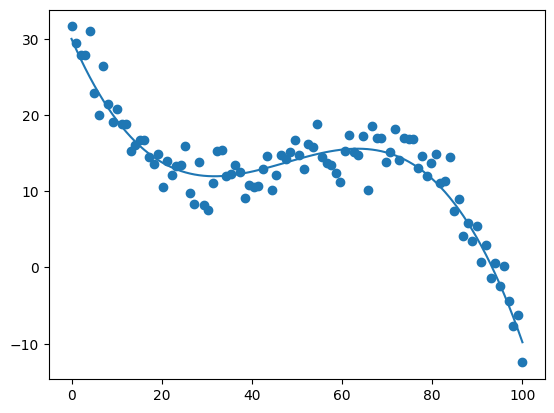

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -0.000226*x**3+0.032262*x**2-1.3643*x+30

x = np.linspace(0, 100, 100)
true_y = f(x)
y = true_y + np.random.normal(0, 2, len(true_y))

plt.plot(x, true_y)
plt.scatter(x, y)
plt.show()

/tmp/ipykernel_11285/478865656.py:8: RankWarning: Polyfit may be poorly conditioned
  poly_fit = np.polyfit(x, y, deg=77)


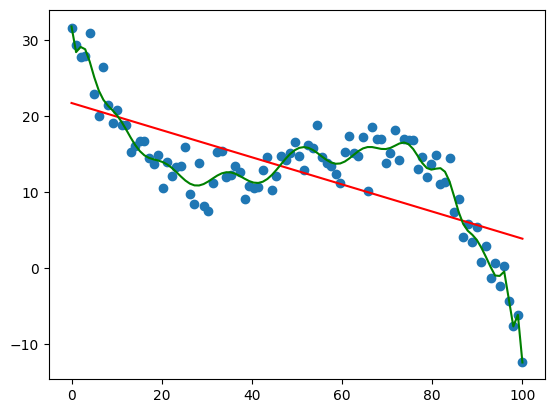

In [10]:
from sklearn.linear_model import LinearRegression


linear_model = LinearRegression()
linear_model.fit(np.reshape(x, (-1, 1)), true_y)
linear_y = linear_model.predict(np.reshape(x, (-1, 1)))

poly_fit = np.polyfit(x, y, deg=77)
poly_model = np.poly1d(poly_fit)
poly_y = poly_model(x)

plt.scatter(x, y)
plt.plot(x, linear_y, c='red')
plt.plot(x, poly_y, c='green')
plt.show()

In [11]:
print(linear_model.intercept_, linear_model.coef_[0])
print(poly_fit)

21.742542597694115 -0.17890236710539761
[ 1.32918659e-142 -2.18050483e-140 -1.02126637e-138  7.56244787e-137
  1.57448164e-134  1.28870014e-132  3.64768026e-131 -6.23343667e-129
 -1.24938853e-126 -1.33604899e-124 -9.27365390e-123 -2.24818292e-121
  5.13973250e-119  1.05708864e-116  1.25471578e-114  1.07680988e-112
  5.92475031e-111 -4.64963382e-110 -6.56786060e-107 -1.07374937e-104
 -1.19271053e-102 -9.85827300e-101 -5.16159890e-099  8.88909688e-098
  6.66215458e-095  1.05881898e-092  1.16077645e-090  9.40718538e-089
  4.58320865e-087 -1.55238306e-085 -7.27793844e-083 -1.08962130e-080
 -1.12862980e-078 -8.21653349e-077 -2.55565520e-075  4.00437974e-073
  9.33426284e-071  1.15629083e-068  9.78578667e-067  4.41439841e-065
 -2.72311852e-063 -8.95539991e-061 -1.16981681e-058 -9.56315706e-057
 -3.14170420e-055  4.92199822e-053  1.08529372e-050  1.14329428e-048
  5.86731567e-047 -3.24266342e-045 -1.07769562e-042 -1.17116016e-040
 -4.67509859e-039  6.15702063e-037  1.27058207e-034  8.85826155

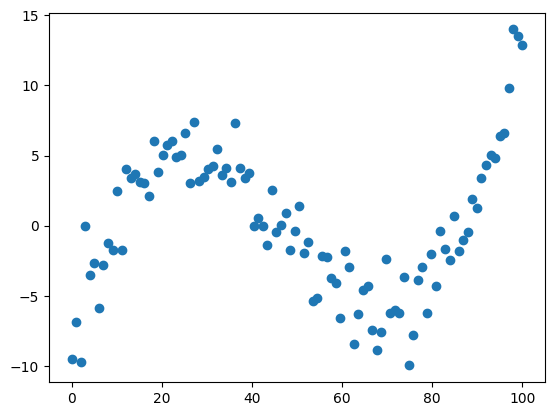

In [46]:
plt.scatter(x, linear_y - y)
plt.show()

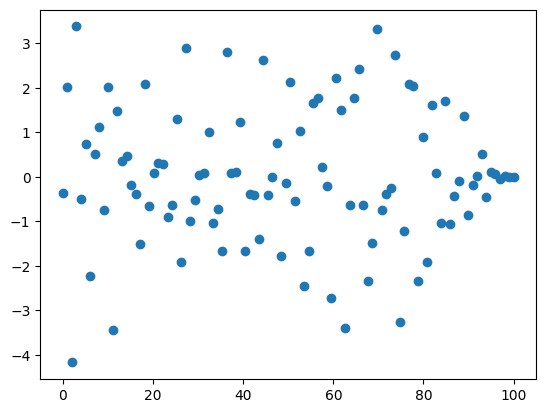

In [47]:
plt.scatter(x, poly_y - y)
plt.show()

In [48]:
import pandas as pd

df = pd.DataFrame({'x': x, 'true_y': true_y, 'y': y, 'linear_y': linear_y, 'polynomial_y': poly_y,
                   'linear_residuals': y - linear_y, 'polynomial_residuals': y - poly_y})
df.to_csv('bias-variance-train.csv', index=False)

In [49]:
test_y = true_y + np.random.normal(0, 2, len(true_y))
df = pd.DataFrame({'x': x, 'y': y_test, 'linear_y': linear_y, 'polynomial_y': poly_y,
                   'linear_residuals': test_y - linear_y, 'polynomial_residuals': test_y - poly_y})
df.to_csv('bias-variance-test.csv', index=False)